# 🧠 Project Overview
This project aims to solve a **classification problem** using a student performance dataset. The goal is to help school administrators identify students at risk of failing, allowing for early intervention.

### 📌 Business Problem
School administrators want to identify students likely to fail the final grade (G3 < 10), so they can implement targeted support.

### 🧑 Stakeholder
School management and academic support teams who need early alerts for students needing academic intervention.

In [3]:
# 📘 Step 1: Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 📊 Business and Data Understanding
The dataset contains features such as study time, failures, absences, and grades (G1, G2, G3). The target variable is whether a student **passes** or **fails**, based on their final grade.
- **G3 < 10 → Fail (0)**
- **G3 >= 10 → Pass (1)**

We will build classification models to predict this target.

In [4]:
# 📊 Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\user\Downloads\student-mat.csv")
df.head()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
# 🔍 Check for missing values and dataset structure
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# 📊 Business and Data Understanding
The dataset contains features such as study time, failures, absences, and grades (G1, G2, G3). The target variable is whether a student **passes** or **fails**, based on their final grade.
- **G3 < 10 → Fail (0)**
- **G3 >= 10 → Pass (1)**

We will build classification models to predict this target.

In [ ]:
## 🧼 Step 3: Data Preprocessing

We'll:
- Encode categorical features
- Create a target variable: pass (1) or fail (0), where G3 < 10 → fail
- Split the dataset into training and test sets


In [5]:
# 🎯 Create binary target variable: pass/fail
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Drop the original G3 grade as it leaks information
df.drop(['G3'], axis=1, inplace=True)

# 🔁 Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 🔍 Features and target
X = df_encoded.drop('pass', axis=1)
y = df_encoded['pass']


In [6]:
# 🧪 Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔄 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#logistic Regression

In [8]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
#Log-likelihood computation
def compute_log_likelihood(model, X, y):
    probs = model.predict_proba(X)
    ll = np.sum(y * np.log(probs[:, 1]) + (1 - y) * np.log(probs[:, 0]))
    return ll

In [10]:
ll_train = compute_log_likelihood(log_model, X_train_scaled, y_train)
ll_test = compute_log_likelihood(log_model, X_test_scaled, y_test)

print(f"\n📊 Log-Likelihood (Train): {ll_train:.2f}")
print(f"📊 Log-Likelihood (Test): {ll_test:.2f}")


📊 Log-Likelihood (Train): -35.14
📊 Log-Likelihood (Test): -14.83


In [11]:
#. Logistic Regression Evaluation
y_pred_log = log_model.predict(X_test_scaled)
print("\n📈 Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_log))


📈 Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.94      0.90      0.92        52

    accuracy                           0.90        79
   macro avg       0.88      0.90      0.89        79
weighted avg       0.90      0.90      0.90        79



#SVM Model

In [12]:
#  SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

#  SVM Evaluation
y_pred_svm = svm_model.predict(X_test_scaled)
print("\n📈 SVM Evaluation:")
print(classification_report(y_test, y_pred_svm))



📈 SVM Evaluation:
              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.85      0.90      0.88        52

    accuracy                           0.84        79
   macro avg       0.82      0.80      0.81        79
weighted avg       0.83      0.84      0.83        79



This was the lowest performing model as indicated by the scores above

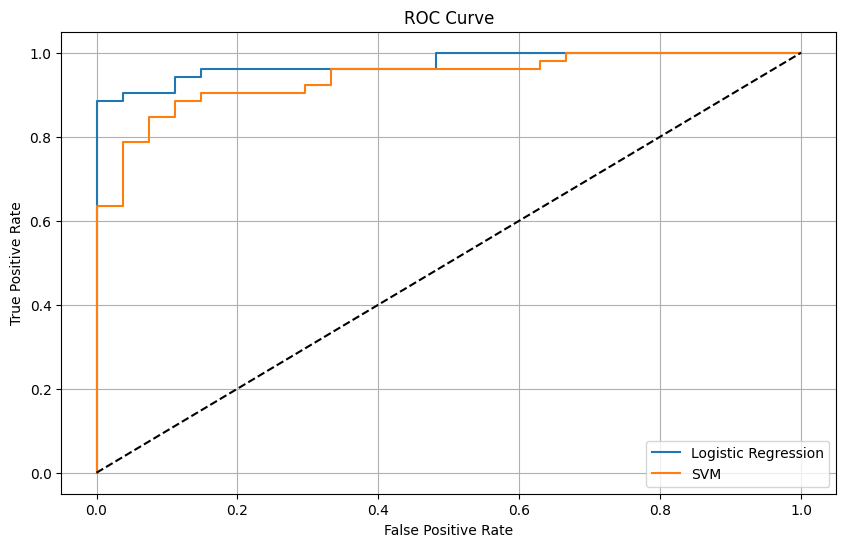

In [31]:
# 📉 8. ROC Curve
from sklearn.metrics import roc_curve

y_probs_log = log_model.predict_proba(X_test_scaled)[:, 1]
y_probs_svm = svm_model.predict_proba(X_test_scaled)[:, 1]


fpr_log, tpr_log,_ = roc_curve(y_test, y_probs_log)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)

plt.figure(figsize=(10,6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

Curves:
There are two curves in this plot:

Blue curve: Logistic Regression

Orange curve: SVM (Support Vector Machine)

Dashed Line:
The diagonal black dashed line represents the performance of a random classifier (i.e., no discrimination ability).

Any model above this line performs better than random guessing.

Interpretation:
Curve Shape:

The closer the curve follows the top-left border, the better the model.

Both Logistic Regression and SVM show strong performance, with the Logistic Regression curve appearing slightly better in the low FPR range.

Comparison:

Logistic Regression generally stays above the SVM curve, suggesting it might have slightly better discrimination capability in this scenario.

This visual interpretation should ideally be confirmed with AUC (Area Under the Curve) values for both models.

ROC Usage:

Useful for comparing different classifiers.

Independent of class distribution and decision threshold.

# Train Random Forest Classifier


In [32]:
# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)



In [33]:
# 📈 Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("📊 Accuracy:", round(accuracy, 3))
print("🎯 Precision:", round(precision, 3))
print("🔁 Recall:", round(recall, 3))


📊 Accuracy: 0.911
🎯 Precision: 0.959
🔁 Recall: 0.904


With higher scores for precision, accuracy and Recall the train random forest is my best performing model to make informed predictions.

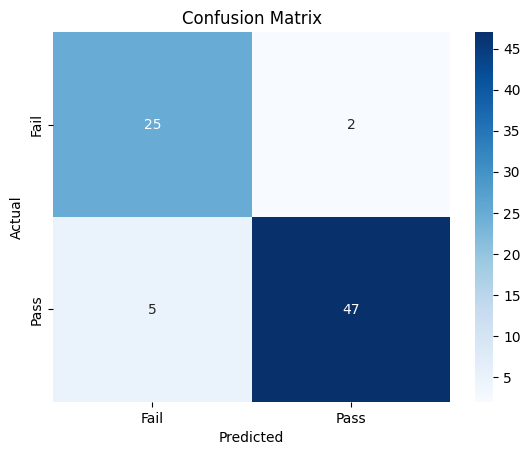


📋 Classification Report:

              precision    recall  f1-score   support

        Fail       0.83      0.93      0.88        27
        Pass       0.96      0.90      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.92      0.91      0.91        79



In [34]:
# 🧩 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Detailed report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))


INTERPRETATION
Class(Fail):
Precision- 83% of those who failed were predicted correctly
Recall-    93% of those who failed were caught whenever the model predicted
F1-score-  88% meaning there was a good balance between precision and recall
support-   there were 27 actual fail instances

Class(Pass):
Precision- 96% of those who passed were predicted correctly
Recall-    Out of the pass instances, the model caught 90% of them
F1-score-  93% meaning there was a good balance between precision and recall
support-   there were 52 actual pass instances
